# 🧩 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

---

## 📘 개요

**DBSCAN**은 **밀도 기반 클러스터링 알고리즘**으로,  
데이터의 **밀도(density)** 를 이용해 **클러스터(군집)** 를 형성합니다.  

> **핵심 아이디어**  
> - 데이터가 **빽빽한 지역(고밀도 영역)** 은 하나의 군집으로 묶고  
> - **드문 지역(저밀도 영역)** 은 **노이즈(이상치)** 로 간주합니다.

---

## 🧠 주요 특징

| 항목 | 설명 |
|------|------|
| **클러스터 개수를 미리 지정할 필요 없음** | `KMeans`처럼 `k`를 지정하지 않아도 됨 |
| **비선형 구조 탐색 가능** | 원형, 나선형 등 복잡한 패턴 탐색 가능 |
| **이상치 자동 감지** | 밀도가 낮은 점을 자동으로 노이즈로 분류 |
| **스케일링 필요** | 거리 기반이므로 `StandardScaler` 또는 `MinMaxScaler` 적용 필수 |

---

## ⚙️ 주요 매개변수 (Parameters)

| 매개변수 | 기본값 | 설명 |
|-----------|---------|------|
| **`eps`** | `0.5` | 두 샘플이 같은 군집으로 간주되기 위한 최대 거리 (반경) |
| **`min_samples`** | `5` | 핵심점(core point)으로 판단하기 위한 최소 이웃 수 |
| **`metric`** | `'euclidean'` | 거리 계산 방법 (`manhattan`, `cosine`, 등 가능) |
| **`metric_params`** | `None` | 거리 계산 시 추가 인자 설정 |
| **`algorithm`** | `'auto'` | 이웃 탐색 알고리즘 (`auto`, `ball_tree`, `kd_tree`, `brute`) |
| **`leaf_size`** | `30` | BallTree/KDTree의 리프 크기 (성능 조절용) |
| **`p`** | `2` | Minkowski 거리 차수 (`p=1`: Manhattan, `p=2`: Euclidean) |
| **`n_jobs`** | `None` | 병렬 계산 시 CPU 코어 수 (`-1`은 모든 코어 사용) |

---

| metric 값        | 의미          |
| --------------- | ----------- |
| `'euclidean'`(유클리드 거리)   | 기본값 (표준 거리) |
| `'manhattan'`(맨해튼 거리)   | 직각 축 기반 거리  |
| `'chebyshev'`(체비쇼프 거리)   | 최대 축 차이 기반  |
| `'cosine'` (코사인 거리)     | 벡터 방향 기반    |
| `'mahalanobis'`(마할라노비스 거리) | 변수 간 상관 반영  |
| `'hamming'`(해밍 거리)     | 이진 데이터 전용   |

--
| 옵션 값          | 내부 구조               | 특징                                             | 추천 상황                  |
| ------------- | ------------------- | ---------------------------------------------- | ---------------------- |
| `'auto'`      | 자동 선택 (기본값)         | 데이터 특성에 따라 자동으로 BallTree / KDTree / brute 중 선택 | 대부분의 경우                |
| `'ball_tree'` | BallTree            | 고차원에서도 효율적인 거리 탐색 (공간 분할 기반)                   | n_features가 많을 때       |
| `'kd_tree'`   | KDTree              | 저차원(≲20D)에서 매우 빠름                              | 피처 수가 적을 때 (2~10D)     |
| `'brute'`     | Brute-force (전수 계산) | 모든 점 간 거리 계산 (정확하지만 느림)                        | 데이터가 매우 작을 때 (≲5,000개) |
---



## 📊 주요 속성 (Attributes)

| 속성명 | 설명 |
|---------|------|
| **`core_sample_indices_`** | 핵심점(core point)의 인덱스 목록 |
| **`components_`** | 핵심점 좌표 배열 |
| **`labels_`** | 각 샘플의 클러스터 라벨 (-1은 노이즈) |
| **`eps`**, **`min_samples`** | 학습에 사용된 파라미터 값 저장 |

---

## 🔧 주요 메서드 (Methods)

| 메서드 | 설명 |
|---------|------|
| **`fit(X)`** | 입력 데이터 `X`로 모델 학습 및 군집 형성 |
| **`fit_predict(X)`** | 학습 후 바로 클러스터 라벨 반환 |
| **`get_params()`** | 현재 파라미터 확인 |
| **`set_params(**params)`** | 파라미터 업데이트 |

---

## 🧩 동작 원리 (Algorithm Steps)

1. 각 점에 대해 **ε 반경 내의 이웃 점 개수** 계산  
2. 각 점을 세 가지로 분류  
   - 🟢 **Core Point (핵심점)** : ε 반경 내 이웃 ≥ `min_samples`  
   - 🟡 **Border Point (경계점)** : 핵심점 근처에 있지만 자신은 핵심 아님  
   - ⚪ **Noise Point (노이즈점)** : 어떤 군집에도 속하지 않음  
3. 핵심점에서 시작해 이웃을 계속 확장하면서 군집 형성

---
## 🧭 파라미터 튜닝 팁

| 상황 | 권장 조정 |
|------|------------|
| 너무 많은 노이즈 발생 | `eps` ↑ 또는 `min_samples` ↓ |
| 클러스터가 뭉쳐버림 | `eps` ↓ |
| 데이터 차원이 높음 | 거리 왜곡 가능 → PCA 등으로 차원 축소 후 수행 |
| 속도 느림 | `algorithm='kd_tree'`, `n_jobs=-1` 사용 |

---

## 🔍 다른 알고리즘과 비교

| 알고리즘 | 특징 | 필요 매개변수 |
|-----------|-------|----------------|
| **KMeans** | 구형 군집, 빠름 | `n_clusters` 필요 |
| **DBSCAN** | 밀도 기반, 이상치 감지 | `eps`, `min_samples` |
| **OPTICS** | DBSCAN 확장형, 자동 eps 탐색 | `min_samples` |
| **HDBSCAN** | 계층형 밀도 기반 | 자동 클러스터 수 결정 |

---

## ✅ 한 줄 요약

> **DBSCAN은 “밀도가 높은 지역을 군집으로 묶고, 희소한 지역을 노이즈로 간주”하는 비선형 클러스터링 알고리즘이다.**
>  
> 파라미터 `eps`와 `min_samples`를 잘 조정하면 복잡한 형태의 데이터 구조도 효과적으로 분리할 수 있다.

In [1]:
# =============================================================================
# DBSCAN on bodyPerformance.csv  (주석: 한국어 자세한 설명 버전)
# -----------------------------------------------------------------------------
# 이 스크립트는 다음 단계를 수행합니다.
#  1) CSV 로드 → 컬럼명 정리 → 범주형 인코딩 → 결측/무한치 제거 → 스케일링
#  2) (선택) k-distance plot으로 eps 후보 탐색
#  3) DBSCAN(eps, min_samples)으로 군집화 수행
#  4) 내부 검증 지표(실루엣, 칼린스키-하라바사즈, 데이비스-볼딘) 계산
#     - 내부 지표(Internal): 정답 라벨 없이 군집 품질 평가 (클수록/작을수록 해석 포함)
#  5) (선택) 외부 검증 지표(ARI, NMI) 계산
#     - 외부 지표(External): 데이터에 'class' 같은 실제 라벨이 있을 때만 사용
#  6) PCA 2D로 시각화 (클러스터별 색상, 노이즈 -1은 회색)
#  7) 각 클러스터 크기 요약
#
# ※ 용어 정리
#   - eps: 반경(ε). 한 점의 "이웃"으로 간주할 최대 거리.
#   - min_samples: 핵심점(core point)로 인정받기 위한 최소 이웃 수.
#   - label -1: DBSCAN이 "노이즈(이상치)"로 판정한 샘플.
#
# ※ 검증 지표 요약
#   (1) 실루엣(Silhouette, ↑ 클수록 좋음)
#       - 동일 클러스터 내 응집도(가까움) vs 다른 클러스터와 분리도(멀어짐)의 균형
#       - 값 범위 [-1, 1]. 보통 0.5 이상이면 군집이 꽤 잘 분리된 편.
#   (2) 칼린스키-하라바사즈(Calinski-Harabasz, ↑ 클수록 좋음)
#       - 클러스터 간 분산(멀리 떨어짐) / 클러스터 내 분산(응집)의 비율
#       - 값이 커질수록 군집 간 구분이 선명하고 내부가 조밀함을 의미.
#   (3) 데이비스-볼딘(Davies-Bouldin, ↓ 작을수록 좋음)
#       - 각 클러스터 쌍의 "유사도(겹침)" 평균. 값이 작을수록 덜 겹침.
#   (4) (라벨 있을 때만) ARI / NMI (둘 다 ↑ 클수록 좋음)
#       - ARI(Adjusted Rand Index): 정답 라벨과 군집 라벨의 일치도(우연 일치 보정 포함).
#       - NMI(Normalized Mutual Information): 정보 이론 관점에서의 일치도.
#
# ※ 파라미터 튜닝 Tip
#   - 노이즈가 너무 많다 → eps ↑ 또는 min_samples ↓
#   - 서로 다른 군집이 뭉뚱그려진다 → eps ↓ (더 엄격하게)
#   - 차원이 높아 거리 왜곡 우려 → PCA(예: 10~30차원) 후 DBSCAN 시도
#   - eps 선택은 k-distance plot(예: k=10)에서 "팔꿈치(굽어지는 지점)"를 참고
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    adjusted_rand_score, normalized_mutual_info_score
)

df = pd.read_csv("data/bodyPerformance.csv")

# (2) 외부 지표 계산을 위해 'class' 라벨을 별도로 보관 (있을 때만)
#     - DBSCAN은 비지도학습이라 사용하지 않지만, 평가(ARI/NMI)에 활용할 수 있습니다.
y_true = None
if "class" in df.columns:
    y_true = LabelEncoder().fit_transform(df["class"].astype(str).values)
    df = df.drop(columns=["class"])

# (3) 범주형(문자열) 컬럼 인코딩
#     - DBSCAN은 거리 기반 → 모든 입력이 수치형이어야 합니다.
#     - 예: gender(M/F) 같은 컬럼을 LabelEncoder로 0/1 등으로 변환
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# (4) 결측/무한치 제거
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

# ---------------------- 3) 스케일링 ----------------------
# - 거리 기반 알고리즘에서는 피처 스케일이 매우 중요합니다.
# - StandardScaler: 평균 0, 표준편차 1로 맞춰서 모든 피처가 비슷한 영향력을 갖도록 함.
X = df.values
X = StandardScaler().fit_transform(X)


In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Users/munbyeongseon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/munbyeongseon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/munbyeongseon/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure

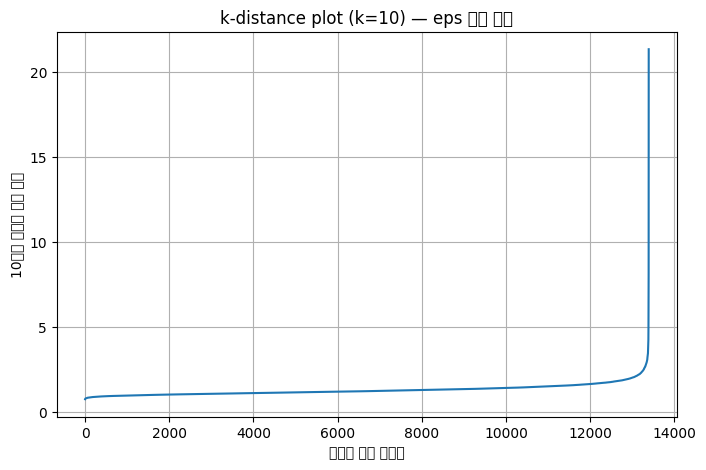

급격히 증가하는 인덱스 예시: [13357 13370 13371 13374 13376]
대략적인 eps 후보: 3.051


In [3]:
# 2️⃣ k번째 최근접 거리 계산 (k = min_samples 값, 일반적으로 5~10)
k = 10
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, _ = nbrs.kneighbors(X)

# 각 샘플에서 10번째 이웃 거리만 추출
kth_dist = np.sort(distances[:, -1])

# 3️⃣ 시각화: k-distance plot
plt.figure(figsize=(8,5))
plt.plot(kth_dist)
plt.title(f"k-distance plot (k={k}) — eps 후보 찾기")
plt.xlabel("정렬된 샘플 인덱스")
plt.ylabel(f"{k}번째 최근접 이웃 거리")
plt.grid(True)
plt.show()

# 4️⃣ eps ≈ 꺾이는 지점(elbow point)
#    -> 아래처럼 threshold 기준으로 확인할 수도 있음 (자동 탐지 아이디어 예시)
diffs = np.diff(kth_dist)                   # 인접 거리 차이
eps_candidates = np.where(diffs > 0.05)[0]  # 증가 폭이 커지는 구간 (임계값=0.05)
print("급격히 증가하는 인덱스 예시:", eps_candidates[:5])
print("대략적인 eps 후보:", round(kth_dist[eps_candidates[0]], 3))


DBSCAN(eps=1.8, min_samples=10) 결과
- 클러스터 개수: 2
- 노이즈 포인트 개수: 247

[내부 지표 — 비노이즈 샘플 기준]
- Silhouette (↑ 클수록 좋음): 0.3447
- Calinski-Harabasz (↑ 클수록 좋음): 7756.99
- Davies-Bouldin (↓ 작을수록 좋음): 1.2081

[외부 지표 — 실제 라벨과의 일치도]
- ARI (↑ 클수록 좋음): 0.0043
- NMI (↑ 클수록 좋음): 0.0137


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

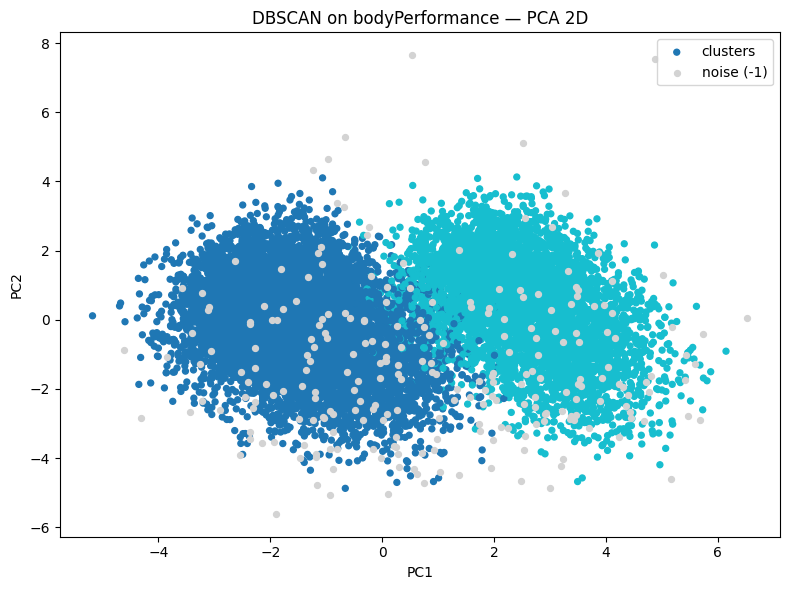


[클러스터별 샘플 수] (라벨: 개수)  ※ -1은 노이즈
{-1: 247, 0: 8305, 1: 4841}


In [ ]:

# ---------------------- 5) DBSCAN 학습 ----------------------
# - eps / min_samples는 데이터/스케일에 따라 달라집니다.
# - 아래 값은 bodyPerformance에서 자주 무난한 출발점 예시입니다.
eps = 1.8          # 반경 (※ k-distance plot으로 조정 권장)
min_samples = 10   # 핵심점 최소 이웃 수 (보통 5 ~ 2*차원 정도 범위 시도)

db = DBSCAN(
    eps=eps,
    min_samples=min_samples,
    metric="euclidean",  # 다른 선택: 'manhattan', 'cosine' 등
    n_jobs=-1            # 멀티코어 사용(가능한 경우)
)

labels = db.fit_predict(X)  # 각 샘플의 군집 라벨(-1은 노이즈)

# ---------------------- 6) 결과 요약 ---------------------- 
n_clusters = len( set(labels)) - (1 if -1 in labels else 0)  # 라벨 집합에서 -1(노이즈) 제외
n_noise = int(np.sum(labels == -1))
print(f"\nDBSCAN(eps={eps}, min_samples={min_samples}) 결과")
print(f"- 클러스터 개수: {n_clusters}")
print(f"- 노이즈 포인트 개수: {n_noise}")

# ---------------------- 7) 내부 검증 지표 ----------------------
# - 내부 지표는 정답 라벨 없이 군집 품질을 가늠할 수 있는 지표입니다.
# - 실루엣(silhouette, ↑), CH(↑), DB(↓)를 모두 함께 보는 것을 권장합니다.
# - DBSCAN은 노이즈(-1)가 있을 수 있으므로, 일반적으로 "비노이즈 샘플"에 대해서만 계산합니다.
mask = labels != -1
if np.sum(mask) > 10 and len(set(labels[mask])) >= 2:
    sil = silhouette_score(X[mask], labels[mask])
    ch = calinski_harabasz_score(X[mask], labels[mask])
    dbi = davies_bouldin_score(X[mask], labels[mask])
    print("\n[내부 지표 — 비노이즈 샘플 기준]")
    print(f"- Silhouette (↑ 클수록 좋음): {sil:.4f}")
    print(f"- Calinski-Harabasz (↑ 클수록 좋음): {ch:.2f}")
    print(f"- Davies-Bouldin (↓ 작을수록 좋음): {dbi:.4f}")
else:
    print("\n[내부 지표] 계산 생략: 비노이즈 샘플이 너무 적거나(≤10) 유효 클러스터(<2) 미만")

# ---------------------- 8) (선택) 외부 검증 지표 ----------------------
# - 외부 지표는 정답 라벨(y_true)이 있을 때만 사용합니다.
# - ARI / NMI는 "군집 라벨"과 "실제 라벨"의 일치도를 평가합니다.
    # 노이즈 포함/제외 모두 가능하나, 비교의 일관성을 위해 전체에 대해 계산
ari = adjusted_rand_score(y_true, labels)
nmi = normalized_mutual_info_score(y_true, labels)
print("\n[외부 지표 — 실제 라벨과의 일치도]")
print(f"- ARI (↑ 클수록 좋음): {ari:.4f}")
print(f"- NMI (↑ 클수록 좋음): {nmi:.4f}")

# ---------------------- 9) PCA 2D 시각화 ----------------------
# - 고차원 데이터를 2D로 축소하여 군집 결과를 직관적으로 확인합니다.
# - 노이즈(-1)는 회색으로 표시하여 분포를 한눈에 파악합니다.
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(8,6))
# 비노이즈: 탭 컬러맵으로 군집 색상
non_noise = labels != -1
plt.scatter(X_2d[non_noise, 0], X_2d[non_noise, 1],
            c=labels[non_noise], s=18, cmap="tab10", label="clusters")
# 노이즈: 연한 회색으로 오버레이
plt.scatter(X_2d[~non_noise, 0], X_2d[~non_noise, 1],
            c="lightgray", s=18, label="noise (-1)")

plt.title("DBSCAN on bodyPerformance — PCA 2D")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# ---------------------- 10) (옵션) 클러스터 크기 테이블 ----------------------
unique, counts = np.unique(labels, return_counts=True)
size_table = dict(zip(unique, counts))
print("\n[클러스터별 샘플 수] (라벨: 개수)  ※ -1은 노이즈")
print(size_table)

# =============================================================================
# 검증 방법 해석 가이드 (요약)
# -----------------------------------------------------------------------------
# 1) 내부 지표(정답 라벨이 없어도 가능)
#    - Silhouette (↑): 0.5 이상이면 꽤 양호, 0.2~0.5 보통, 0 이하면 군집이 뒤섞인 편.
#    - Calinski-Harabasz (↑): 상대 비교용. 더 클수록 군집 간 분리가 좋고 내부 응집이 좋음.
#    - Davies-Bouldin (↓): 0에 가까울수록 군집 간 겹침이 적음. 상대 비교용으로 모델/파라미터 간 비교.
#
# 2) 외부 지표(정답 라벨 있을 때만)
#    - ARI / NMI (↑): 1에 가까울수록 정답 라벨과 매우 유사한 군집. 0 부근이면 우연 수준.
#
# 3) 실무 팁
#    - eps/min_samples 여러 조합을 시도하고, 위 지표 + 시각화 결과를 함께 보며 선택하세요.
#    - k-distance plot으로 eps 후보를 좁힌 뒤, 실루엣/DB/CH와 그래프 모양을 동시에 평가하면 효율적입니다.
# =============================================================================